<p align="center">
  <img src="https://mmos.com/wp-content/uploads/2021/07/steam-logo-welcome-banner.jpg" alt="Steam Logo">
</p>

# <center>Top Steam Videogames</center>
Descripción general:
Este conjunto de datos completo cubre una amplia gama de videojuegos, incluídas sus especificaciones, precios, descuentos y más. También proporciona información valiosa sobre el mercado de la industria de los videojuegos.


Características clave:

- appid: El ID de la aplicación en la plataforma.
- name: Nombre del juego.
- developer: Desarrollador del juego.
- publisher: Publicador del juego.
- score_rank: (Vacío).
- positive: Número de reseñas positivas.
- negative: Número de reseñas negativas.
- userscore: Puntuación de los usuarios (todos los valores son 0).
- owners: Rango estimado de propietarios del juego.
- average_forever: Tiempo promedio jugado en minutos, calculado a lo largo de toda la vida del juego.
- average_2weeks: Tiempo promedio jugado en las últimas 2 semanas.
- median_forever: Tiempo mediano jugado.
- median_2weeks: Tiempo mediano jugado en las últimas 2 semanas.
- price: Precio actual del juego en centavos de dólar.
- initialprice: Precio inicial del juego en centavos de dólar.
- discount: Descuento actual en porcentaje.
- languages: Número de idiomas disponibles (conteo en representación numérica).
- genre, ccu, tags: (Columnas vacías).


# Análisis inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
videogames_data1 = pd.read_csv('data/top_juegos.csv')


In [3]:
videogames_data2 = pd.read_csv('data/top_juegos_fecha.csv')

C:\Users\David\AppData\Local\Temp\ipykernel_10204\2741891304.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  videogames_data2 = pd.read_csv('data/top_juegos_fecha.csv')


In [4]:
# Combinamos dataframes para añadir la columna 'Release date' a nuestro dataset.
videogames_data = pd.merge(videogames_data1, videogames_data2[['Game', 'Release date']], left_on='name', right_on='Game', how='left')

# Eliminamos la columna Game que se ha añadido
videogames_data.drop('Game', axis=1, inplace=True)

# Cambiamos nombre de columna
videogames_data.rename(columns={'Release date': 'release_date'}, inplace=True)


In [5]:
videogames_data.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,...,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags,release_date
0,570,Dota 2,Valve,Valve,NaN,1777245,389764,0,"200,000,000 .. 500,000,000",39211,...,822,653,0,0,0,573082,NaN,NaN,NaN,2013-07-09
1,730,Counter-Strike: Global Offensive,Valve,Valve,NaN,6892618,982541,0,"100,000,000 .. 200,000,000",29752,...,5360,215,0,0,0,1086164,NaN,NaN,NaN,2012-08-21
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",NaN,1333940,965634,0,"50,000,000 .. 100,000,000",24257,...,6344,254,0,0,0,490082,NaN,NaN,NaN,2017-12-21
3,1063730,New World,Amazon Games,Amazon Games,NaN,191896,80619,0,"50,000,000 .. 100,000,000",10660,...,3893,492,3999,3999,0,12707,NaN,NaN,NaN,2021-09-28
4,440,Team Fortress 2,Valve,Valve,NaN,964115,62958,0,"50,000,000 .. 100,000,000",7732,...,319,185,0,0,0,85168,NaN,NaN,NaN,2007-10-10


In [6]:
videogames_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10300 entries, 0 to 10299
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            10300 non-null  int64  
 1   name             10300 non-null  object 
 2   developer        10290 non-null  object 
 3   publisher        10280 non-null  object 
 4   score_rank       0 non-null      float64
 5   positive         10300 non-null  int64  
 6   negative         10300 non-null  int64  
 7   userscore        10300 non-null  int64  
 8   owners           10300 non-null  object 
 9   average_forever  10300 non-null  int64  
 10  average_2weeks   10300 non-null  int64  
 11  median_forever   10300 non-null  int64  
 12  median_2weeks    10300 non-null  int64  
 13  price            10300 non-null  int64  
 14  initialprice     10300 non-null  int64  
 15  discount         10300 non-null  int64  
 16  languages        10300 non-null  int64  
 17  genre       

In [7]:
videogames_data.describe().T

,count,mean,std,min,25%,50%,75%,max
appid,10300.0,502348.288350,458292.636313,10.0,213670.0,342000.0,700330.0,2399830.0
score_rank,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
positive,10300.0,77453.893204,258256.935261,0.0,12581.0,28062.5,65796.0,6892618.0
negative,10300.0,11668.222330,48792.604421,0.0,1747.0,3559.0,8061.0,982541.0
userscore,10300.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
average_forever,10300.0,2024.349515,3865.979884,0.0,383.0,878.0,2051.0,55912.0
average_2weeks,10300.0,197.150485,550.593889,0.0,0.0,0.0,150.0,7164.0
median_forever,10300.0,645.444660,1154.396363,0.0,137.0,297.5,688.0,15695.0
median_2weeks,10300.0,200.095146,691.956800,0.0,0.0,0.0,134.0,10239.0
price,10300.0,1569.600000,1576.060648,0.0,0.0,1299.0,1999.0,6999.0


Comprobamos si existen más valores nulos

In [8]:
null_values = videogames_data.isnull().sum()
print(null_values.sum())
print(null_values[null_values>0])

41670
developer          10
publisher          20
score_rank      10300
genre           10300
ccu             10300
tags            10300
release_date      440
dtype: int64


Verificamos si hay juegos duplicados

In [9]:
duplicados = len(videogames_data) - len(videogames_data.drop_duplicates())
print(duplicados)

9288


Procedemos a eliminar duplicados. Hacemos más pruebas de extracción de datos y vemos que a partir de los 1000 juegos el resto los duplica.

In [10]:
videogames_data = videogames_data.drop_duplicates()
print(len(videogames_data))

1012


Convertimos la columna 'price' e 'initialprice' a €, ya que están en centavos de dólar y esto puede perjudicar nuestro análisis.

In [6]:
# Tipo de cambio USD a EUR
tipo_cambio_usd_eur = 0.93

# Convertir 'price' y 'initialprice' de centavos de dólar a euros y redondear a 2 decimales
videogames_data['price'] = ((videogames_data['price'] / 100) * tipo_cambio_usd_eur).round(2)
videogames_data['initialprice'] = ((videogames_data['initialprice'] / 100) * tipo_cambio_usd_eur).round(2)

In [7]:
videogames_data.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,...,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags,release_date
0,570,Dota 2,Valve,Valve,NaN,1777245,389764,0,"200,000,000 .. 500,000,000",39211,...,822,653,0.00,0.00,0,573082,NaN,NaN,NaN,2013-07-09
1,730,Counter-Strike: Global Offensive,Valve,Valve,NaN,6892618,982541,0,"100,000,000 .. 200,000,000",29752,...,5360,215,0.00,0.00,0,1086164,NaN,NaN,NaN,2012-08-21
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",NaN,1333940,965634,0,"50,000,000 .. 100,000,000",24257,...,6344,254,0.00,0.00,0,490082,NaN,NaN,NaN,2017-12-21
3,1063730,New World,Amazon Games,Amazon Games,NaN,191896,80619,0,"50,000,000 .. 100,000,000",10660,...,3893,492,37.19,37.19,0,12707,NaN,NaN,NaN,2021-09-28
4,440,Team Fortress 2,Valve,Valve,NaN,964115,62958,0,"50,000,000 .. 100,000,000",7732,...,319,185,0.00,0.00,0,85168,NaN,NaN,NaN,2007-10-10


Observamos la cantidad de juegos gratuitos que ofrece este listado de Steam

In [13]:
# Número de filas con 'price' = 0
price_zero_count = (videogames_data['price'] == 0).sum()

# Número de filas con 'initialprice' = 0
initialprice_zero_count = (videogames_data['initialprice'] == 0).sum()

price_zero_count, initialprice_zero_count


(267, 267)

Revisamos la distribución de las reseñas positivas y negativas.

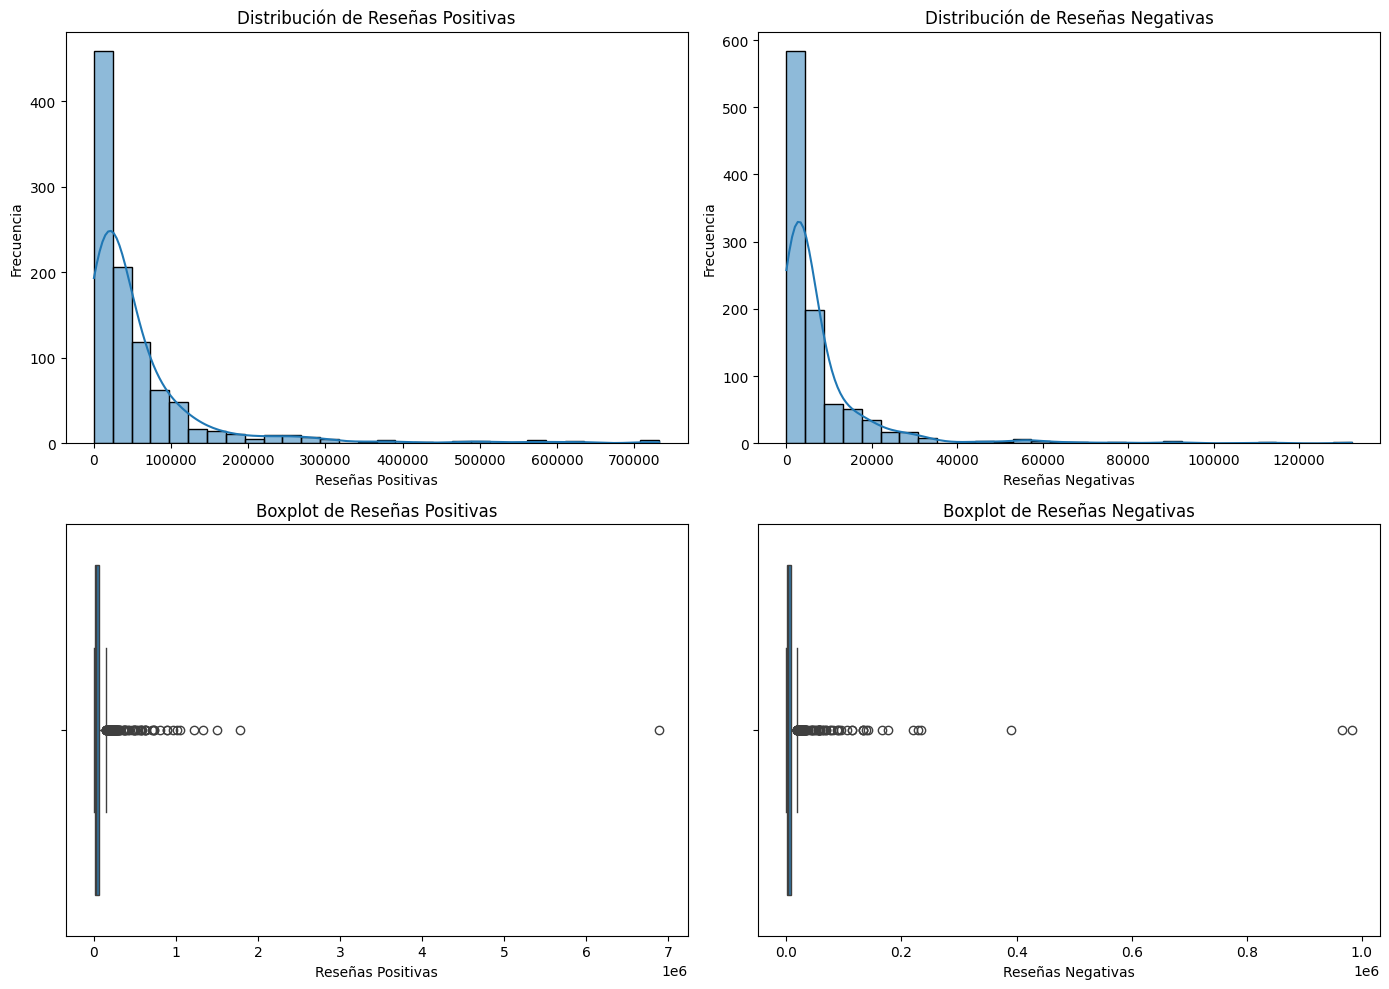

In [14]:
limite_superior_positivos = np.percentile(videogames_data['positive'], 99)
limite_superior_negativos = np.percentile(videogames_data['negative'], 99)

# Crear figuras y ejes para los gráficos
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Histograma de reseñas positivas
sns.histplot(videogames_data[videogames_data['positive'] < limite_superior_positivos]['positive'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribución de Reseñas Positivas')
ax[0, 0].set_xlabel('Reseñas Positivas')
ax[0, 0].set_ylabel('Frecuencia')

# Histograma de reseñas negativas
sns.histplot(videogames_data[videogames_data['negative'] < limite_superior_negativos]['negative'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribución de Reseñas Negativas')
ax[0, 1].set_xlabel('Reseñas Negativas')
ax[0, 1].set_ylabel('Frecuencia')

# Boxplot de reseñas positivas
sns.boxplot(x=videogames_data['positive'], orient='h', ax=ax[1, 0])
ax[1, 0].set_title('Boxplot de Reseñas Positivas')
ax[1, 0].set_xlabel('Reseñas Positivas')

# Boxplot de reseñas negativas
sns.boxplot(x=videogames_data['negative'], orient='h', ax=ax[1, 1])
ax[1, 1].set_title('Boxplot de Reseñas Negativas')
ax[1, 1].set_xlabel('Reseñas Negativas')

plt.tight_layout()
plt.show()


Estos gráficos sugieren que la gran mayoría de los videojuegos reciben pocas reseñas, ya sean positivas o negativas, con solo un pequeño conjunto de juegos que destacan por tener muchas reseñas. Esto puede reflejar un mercado donde unos pocos juegos son extremadamente populares y reciben mucha atención, mientras que la mayoría no alcanza ese nivel de visibilidad o compromiso por parte de los usuarios.

Identificamos los juegos con más reseñas positivas y negativas.

C:\Users\David\AppData\Local\Temp\ipykernel_66352\2902336720.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='positive', y='name', data=top_positive_reviews, ax=ax[0], palette="Blues_r")
C:\Users\David\AppData\Local\Temp\ipykernel_66352\2902336720.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='negative', y='name', data=top_negative_reviews, ax=ax[1], palette="Blues_r")


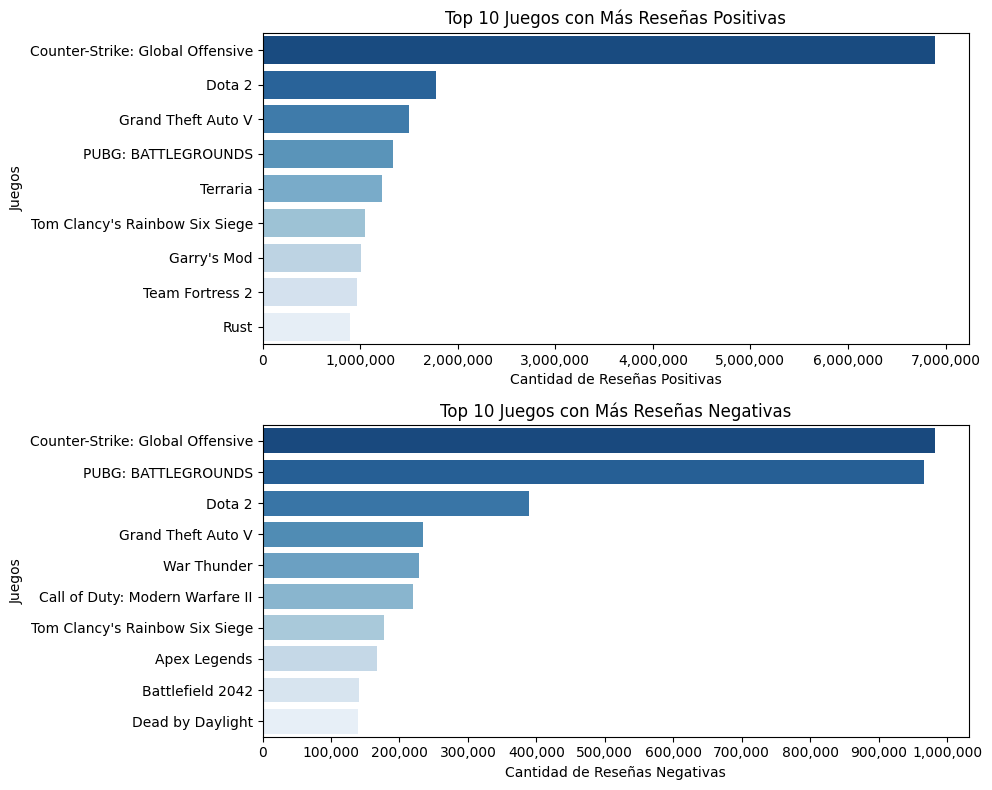

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Ordenamos los datos
top_positive_reviews = videogames_data.sort_values('positive', ascending=False).head(10)
top_negative_reviews = videogames_data.sort_values('negative', ascending=False).head(10)

# Gráficos de barras para cada uno
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de barras para reseñas positivas
sns.barplot(x='positive', y='name', data=top_positive_reviews, ax=ax[0], palette="Blues_r")
ax[0].set_title('Top 10 Juegos con Más Reseñas Positivas')
ax[0].set_xlabel('Cantidad de Reseñas Positivas')
ax[0].set_ylabel('Juegos')
# Establecer formato del eje x para mostrar números enteros
ax[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Establecer el intervalo de las marcas principales en el eje x
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(base=1000000))

# Gráfico de barras para reseñas negativas
sns.barplot(x='negative', y='name', data=top_negative_reviews, ax=ax[1], palette="Blues_r")
ax[1].set_title('Top 10 Juegos con Más Reseñas Negativas')
ax[1].set_xlabel('Cantidad de Reseñas Negativas')
ax[1].set_ylabel('Juegos')
# Establecer formato del eje x para mostrar números enteros
ax[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Establecer el intervalo de las marcas principales en el eje x
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(base=100000)) # Ajusta este valor según tus necesidades específicas

plt.tight_layout()
plt.show()


Análisis preliminar de precios en relación con las reseñas positivas y negativas.

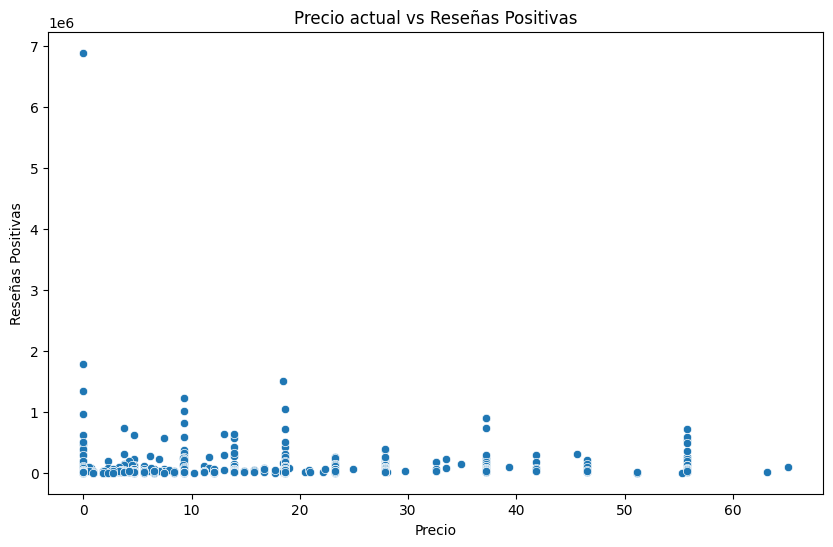

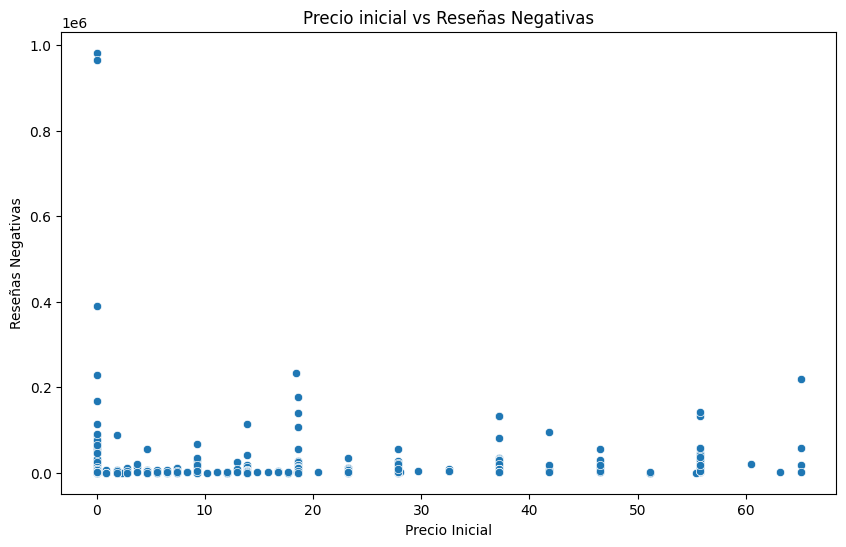

In [16]:
# Gráfico de dispersión para el precio actual en euros vs reseñas positivas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=videogames_data, x='price', y='positive')
plt.title('Precio actual vs Reseñas Positivas')
plt.xlabel('Precio')
plt.ylabel('Reseñas Positivas')
plt.show()

# Gráfico de dispersión para el precio inicial en euros vs reseñas negativas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=videogames_data, x='initialprice', y='negative')
plt.title('Precio inicial vs Reseñas Negativas')
plt.xlabel('Precio Inicial')
plt.ylabel('Reseñas Negativas')
plt.show()


Observamos como despunta el Counter Strike para las reseñas positivas y de nuevo el Counter Strike más el PUBG despuntan en  las negativas. Los gráficos sugieren que los juegos con precios bajos o gratuitos tienden a tener un número menor de reseñas tanto positivas como negativas.

Hacemos un pequeño análisis entre el tiempo de juego vs. reseñas, para identificar patrones visuales que puedan sugerir relaciones interesantes para explorar más adelante en el EDA.

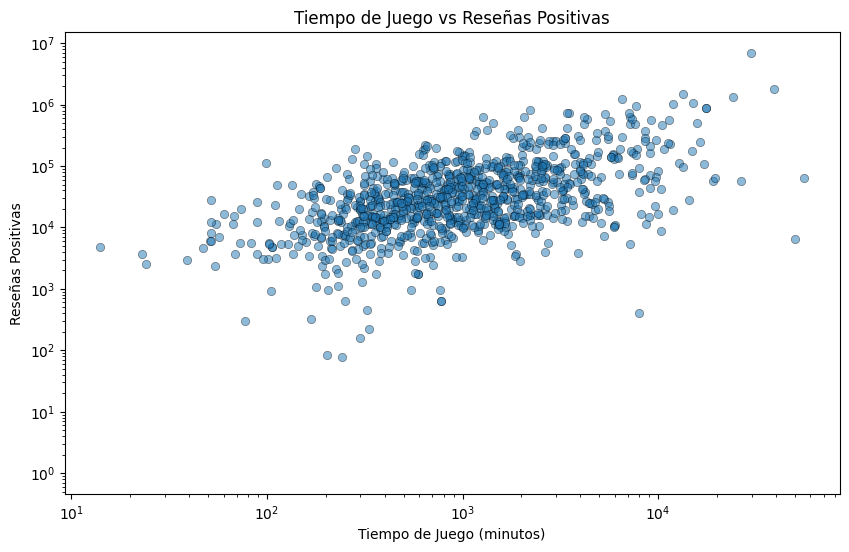

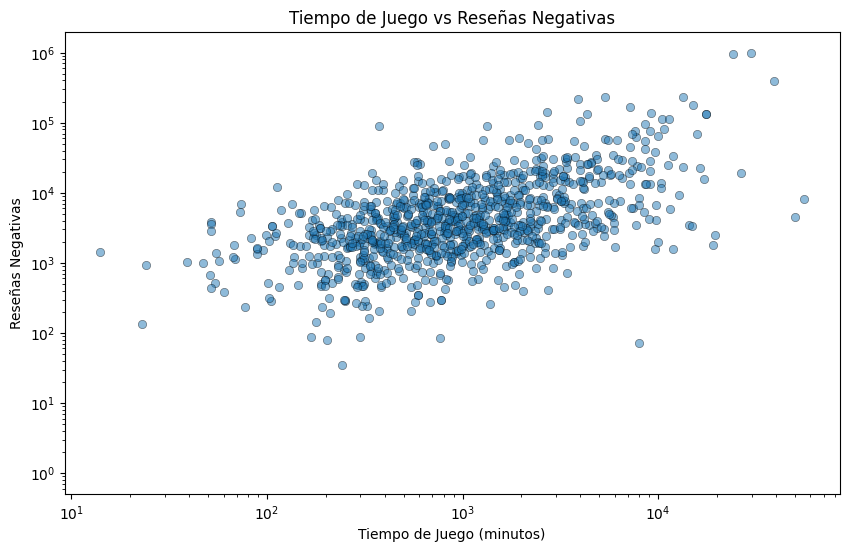

In [17]:
# Gráfico de dispersión para el tiempo de juego vs reseñas positivas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=videogames_data, x='average_forever', y='positive', alpha=0.5, edgecolor='black')
plt.title('Tiempo de Juego vs Reseñas Positivas')
plt.xlabel('Tiempo de Juego (minutos)')
plt.ylabel('Reseñas Positivas')
plt.xscale('log')  # Aplicamos escala logarítmica para una mejor visualización
plt.yscale('log')  # Aplicamos escala logarítmica para una mejor visualización
plt.show()

# Gráfico de dispersión para el tiempo de juego vs reseñas negativas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=videogames_data, x='average_forever', y='negative', alpha=0.5, edgecolor='black')
plt.title('Tiempo de Juego vs Reseñas Negativas')
plt.xlabel('Tiempo de Juego (minutos)')
plt.ylabel('Reseñas Negativas')
plt.xscale('log')  # Aplicamos escala logarítmica para una mejor visualización
plt.yscale('log')  # Aplicamos escala logarítmica para una mejor visualización
plt.show()


A medida que el tiempo de juego aumenta, parece haber una tendencia general hacia un mayor número de reseñas positivas. Esto podría indicar que los juegos que enganchan a los jugadores por más tiempo tienden a recibir más reseñas positivas, posiblemente reflejando una mayor satisfacción con el juego.

La relación entre el tiempo de juego y las reseñas negativas también muestra una dispersión, pero parece menos definida que con las reseñas positivas. Aunque hay algunos juegos con un tiempo de juego considerable y un número elevado de reseñas negativas.

Observamos tendencias a lo largo del tiempo, mostrando la relación entre la cantidad de juegos lanzados cada año.

In [18]:
videogames_data.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,...,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags,release_date
0,570,Dota 2,Valve,Valve,NaN,1777245,389764,0,"200,000,000 .. 500,000,000",39211,...,822,653,0.00,0.00,0,573082,NaN,NaN,NaN,2013-07-09
1,730,Counter-Strike: Global Offensive,Valve,Valve,NaN,6892618,982541,0,"100,000,000 .. 200,000,000",29752,...,5360,215,0.00,0.00,0,1086164,NaN,NaN,NaN,2012-08-21
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",NaN,1333940,965634,0,"50,000,000 .. 100,000,000",24257,...,6344,254,0.00,0.00,0,490082,NaN,NaN,NaN,2017-12-21
3,1063730,New World,Amazon Games,Amazon Games,NaN,191896,80619,0,"50,000,000 .. 100,000,000",10660,...,3893,492,37.19,37.19,0,12707,NaN,NaN,NaN,2021-09-28
4,440,Team Fortress 2,Valve,Valve,NaN,964115,62958,0,"50,000,000 .. 100,000,000",7732,...,319,185,0.00,0.00,0,85168,NaN,NaN,NaN,2007-10-10


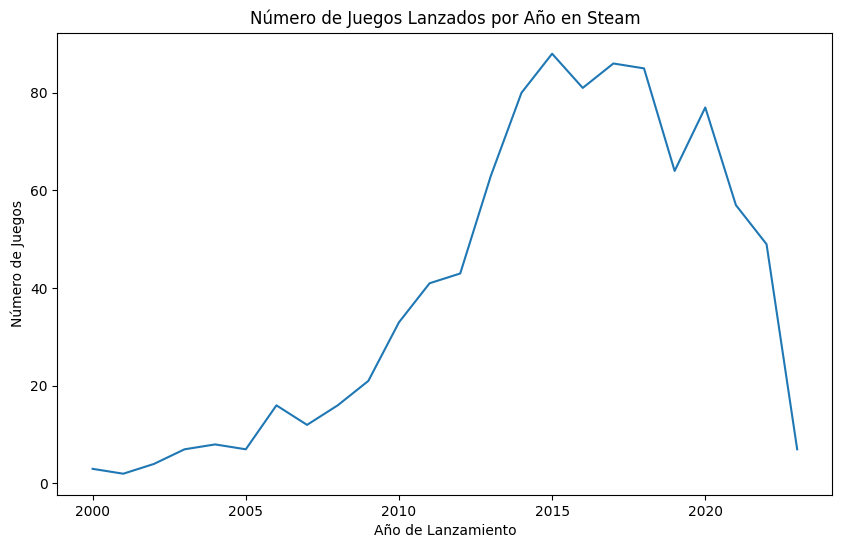

In [37]:
# Extraemos el año de la fecha de lanzamiento 'Release date'
videogames_data['release_year'] = pd.to_datetime(videogames_data['release_date'], errors='coerce').dt.year

videogames_data = videogames_data.loc[videogames_data['release_year'] >= 2000]

# Contamos el número de juegos lanzados cada año
games_per_year = videogames_data.groupby('release_year').size()

# Crear un gráfico de línea
plt.figure(figsize=(10, 6))
games_per_year.plot(kind='line')
plt.title('Número de Juegos Lanzados por Año en Steam')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.show()


Visualizamos tendencias entre el tiempo promedio jugado en relación con la fecha de lanzamiento.

C:\Users\David\AppData\Local\Temp\ipykernel_66352\3707515346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videogames_data['release_date'] = pd.to_datetime(videogames_data['release_date'], errors='coerce')


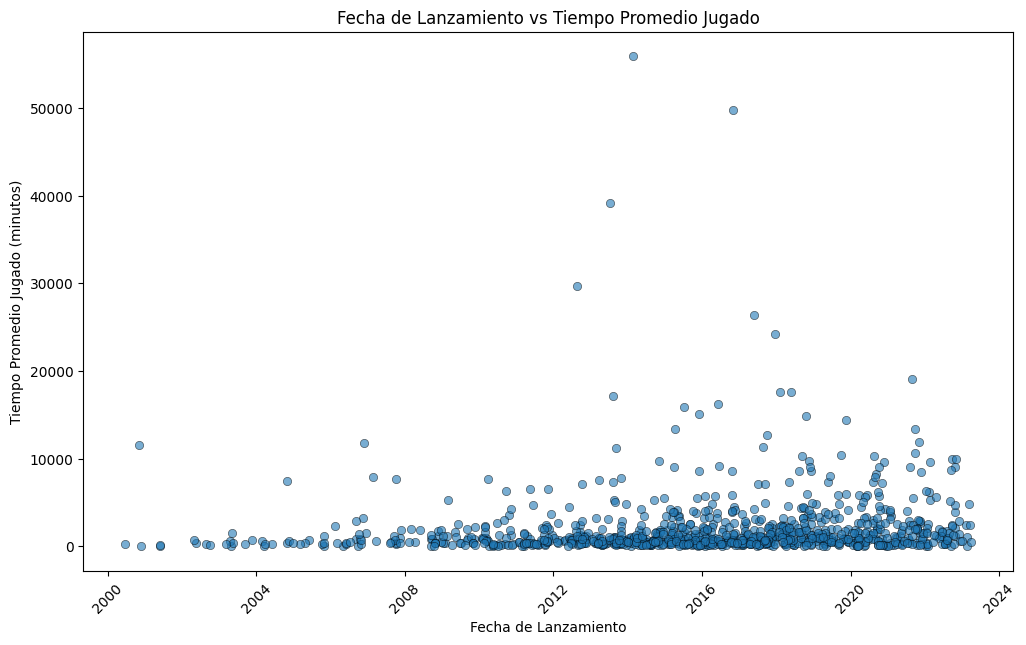

In [38]:
# Convertimos 'Release date' a datetime
videogames_data['release_date'] = pd.to_datetime(videogames_data['release_date'], errors='coerce')

plt.figure(figsize=(12, 7))
sns.scatterplot(x='release_date', y='average_forever', data=videogames_data, alpha=0.6, edgecolor='black')

plt.title('Fecha de Lanzamiento vs Tiempo Promedio Jugado')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Tiempo Promedio Jugado (minutos)')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor legibilidad

plt.show()

Observamos como a medida que se acerca a fechas más recientes, aumentan las horas de juego. Esto también se debe a cómo ha evolucionado el mundo de los videojuegos.

### Exportamos a csv con lo que hemos trabajado hasta ahora para seguir trabajándolo en el notebook de preprocesamiento

In [21]:
videogames_data.to_csv('data/videogames_analysis.csv', index=False)